In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/keon/Desktop/walmart2/dtxwalmart/data/new_cleaned_data.csv')
df

/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_50518/2671159239.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/keon/Desktop/walmart2/dtxwalmart/data/new_cleaned_data.csv')


,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude
0,3615,Neighborhood Market FM Reg14-12 INSOURCE,2217 NW 23RD ST,Westrock,SOLID WASTE,REPAIR - REACTIVE,Empty and Return (not a repair),1.51,2020-11-03 10:17:59,64.0,533.0,NaN,NaN,OKLAHOMA CITY,OK,35.494581,-97.550623
1,830,Walmart FM Reg 12-2,1901 1ST AVE,Rubicon Global,SOLID WASTE,REPAIR - REACTIVE,Empty and Return (not a repair),2.78,2020-11-10 12:54:44,25.0,279.0,NaN,NaN,ROCK FALLS,IL,41.763361,-89.687051
2,3261,Supercenter FM Reg 12-3,2801 DUPORTAIL ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,6.75,2020-11-20 09:20:31,60.0,475.0,NaN,NaN,RICHLAND,WA,46.255981,-119.307922
3,2733,Supercenter FM Reg 11-2,1009 SAINT PATRICKS DR,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,10.86,2020-11-27 15:00:20,2.0,32.0,NaN,NaN,PERRY,GA,32.472626,-83.739099
4,1059,Supercenter FM Reg 15-10 INSOURCE,1309 HIGHWAY 35 S,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,3.88,2020-12-01 08:11:43,11.0,138.0,NaN,NaN,FOREST,MS,32.338638,-89.486173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413705,5370,WM Supercenter,2514 MAIN ST,NaN,NaN,NaN,NaN,7.75,2024-01-31,NaN,NaN,NaN,80504.0,LONGMONT,CO,40.205153,-105.098807
413706,4839,Sam's Club,7757 S OLYMPIA AVENUE W,NaN,NaN,NaN,NaN,9.33,2024-01-31,NaN,NaN,NaN,74132.0,TULSA,OK,36.050971,-96.003787
413707,6631,Sam's Club,880 S ABILENE ST,NaN,NaN,NaN,NaN,7.63,2024-01-31,NaN,NaN,NaN,80012.0,AURORA,CO,39.700498,-104.825655
413708,720,WM Supercenter,301 LEONARDWOOD RD,NaN,NaN,NaN,NaN,9.54,2024-01-31,NaN,NaN,NaN,40601.0,FRANKFORT,KY,38.160546,-84.899191


<div style="font-size: 25px;">
Splitting data into supercenter and non-supercenter locations, taking out 0s in tonnage
<div>

In [4]:
def split_supercenter(df):
    supercenter_df = df[df['Location Name'].str.contains('Supercenter')]
    non_supercenter_df = df[~df['Location Name'].str.contains('Supercenter')]
    return supercenter_df, non_supercenter_df

supercenter_df, non_supercenter_df = split_supercenter(df)



In [5]:
supercenter_df

,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude
2,3261,Supercenter FM Reg 12-3,2801 DUPORTAIL ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,6.75,2020-11-20 09:20:31,60.0,475.0,NaN,NaN,RICHLAND,WA,46.255981,-119.307922
3,2733,Supercenter FM Reg 11-2,1009 SAINT PATRICKS DR,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,10.86,2020-11-27 15:00:20,2.0,32.0,NaN,NaN,PERRY,GA,32.472626,-83.739099
4,1059,Supercenter FM Reg 15-10 INSOURCE,1309 HIGHWAY 35 S,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,3.88,2020-12-01 08:11:43,11.0,138.0,NaN,NaN,FOREST,MS,32.338638,-89.486173
5,2199,Supercenter FM Reg 11-1,50739 VALLEY PLAZA DR,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,8.51,2020-12-01 10:06:41,20.0,216.0,NaN,NaN,SAINT CLAIRSVILLE,OH,40.075741,-80.875036
7,5399,Supercenter FM Reg 12-2,1640 S GALENA AVE,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,7.41,2020-12-04 09:07:30,25.0,279.0,NaN,NaN,DIXON,IL,41.827442,-89.471721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413700,1187,Supercenter,2200 N STATE ST,NaN,NaN,NaN,NaN,7.32,2024-01-31,NaN,NaN,NaN,66749.0,IOLA,KS,37.942863,-95.411625
413703,5428,WM Supercenter,1710 S GREENFIELD RD,NaN,NaN,NaN,NaN,7.34,2024-01-31,NaN,NaN,NaN,85206.0,MESA,AZ,33.384593,-111.739743
413705,5370,WM Supercenter,2514 MAIN ST,NaN,NaN,NaN,NaN,7.75,2024-01-31,NaN,NaN,NaN,80504.0,LONGMONT,CO,40.205153,-105.098807
413708,720,WM Supercenter,301 LEONARDWOOD RD,NaN,NaN,NaN,NaN,9.54,2024-01-31,NaN,NaN,NaN,40601.0,FRANKFORT,KY,38.160546,-84.899191


In [16]:
non_supercenter_df

,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude
0,3615,Neighborhood Market FM Reg14-12 INSOURCE,2217 NW 23RD ST,Westrock,SOLID WASTE,REPAIR - REACTIVE,Empty and Return (not a repair),1.51,2020-11-03 10:17:59,64.0,533.0,NaN,NaN,OKLAHOMA CITY,OK,35.494581,-97.550623
1,830,Walmart FM Reg 12-2,1901 1ST AVE,Rubicon Global,SOLID WASTE,REPAIR - REACTIVE,Empty and Return (not a repair),2.78,2020-11-10 12:54:44,25.0,279.0,NaN,NaN,ROCK FALLS,IL,41.763361,-89.687051
6,830,Walmart FM Reg 12-2,1901 1ST AVE,Rubicon Global,SOLID WASTE,REPAIR - REACTIVE,Compactor is full and needs to be hauled,2.56,2020-12-04 09:06:52,25.0,279.0,NaN,NaN,ROCK FALLS,IL,41.763361,-89.687051
8,1877,Walmart FM Reg 12-4,1250 W HENDERSON AVE,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,0.28,2020-12-05 00:15:01,57.0,581.0,NaN,NaN,PORTERVILLE,CA,36.083402,-119.045347
13,2161,Walmart FM Reg 12-4,4501 ROSEWOOD DR,Rubicon Global,TRASH,REPAIR - REACTIVE,Empty and Return current Open Top on Site,0.00,2020-12-05 00:15:01,56.0,511.0,NaN,NaN,PLEASANTON,CA,37.698383,-121.887262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413701,4490,Neighborhood Market,2565 E. COMMERCE CENTER PLACE,NaN,NaN,NaN,NaN,6.72,2024-01-31,NaN,NaN,NaN,85706.0,TUCSON,AZ,32.147489,-110.933161
413702,6630,Sam's Club,7370 W 52ND AVE,NaN,NaN,NaN,NaN,5.23,2024-01-31,NaN,NaN,NaN,80002.0,ARVADA,CO,39.788491,-105.077791
413704,3479,Neighborhood Market,1819 S 8TH ST,NaN,NaN,NaN,NaN,2.99,2024-01-31,NaN,NaN,NaN,72756.0,ROGERS,AR,36.313291,-94.124261
413706,4839,Sam's Club,7757 S OLYMPIA AVENUE W,NaN,NaN,NaN,NaN,9.33,2024-01-31,NaN,NaN,NaN,74132.0,TULSA,OK,36.050971,-96.003787


In [17]:
def drop_zero_tonnage_rows(df):
    df = df[df['Tonnage'] != 0]
    return df

supercenter_df = drop_zero_tonnage_rows(supercenter_df)
non_supercenter_df = drop_zero_tonnage_rows(non_supercenter_df)

<div style="font-size: 25px;">
Plotting the distribution of tonnages in supercenter and non-supercenter locations
<div>

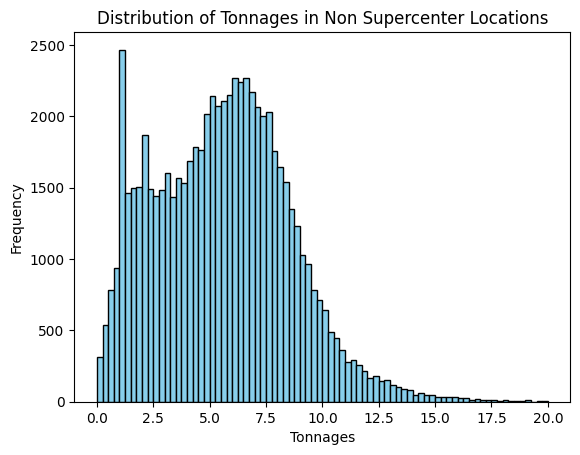

In [21]:
plt.hist(non_supercenter_df['Tonnage'], bins=80, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Non Supercenter Locations')
plt.show()

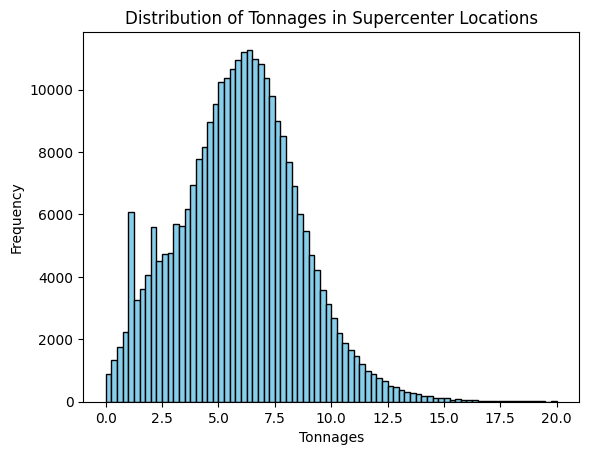

In [22]:
plt.hist(supercenter_df['Tonnage'], bins=80, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Supercenter Locations')
plt.show()

In [23]:
regular_walmart_df = non_supercenter_df[~non_supercenter_df['Location Name'].str.contains('Neighborhood')]
neighborhood_walmart_df = non_supercenter_df[non_supercenter_df['Location Name'].str.contains('Neighborhood')]


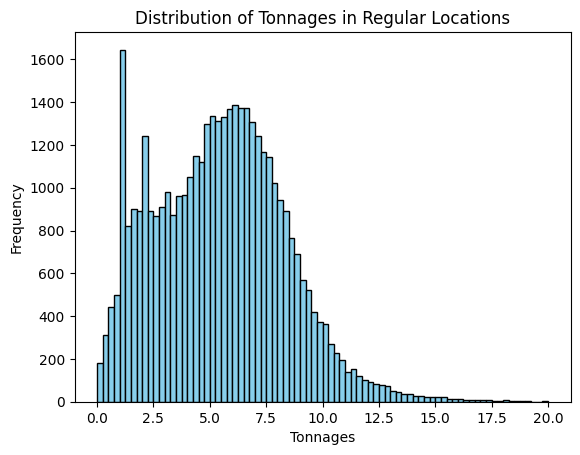

In [24]:
plt.hist(regular_walmart_df['Tonnage'], bins=80, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Regular Locations')
plt.show()

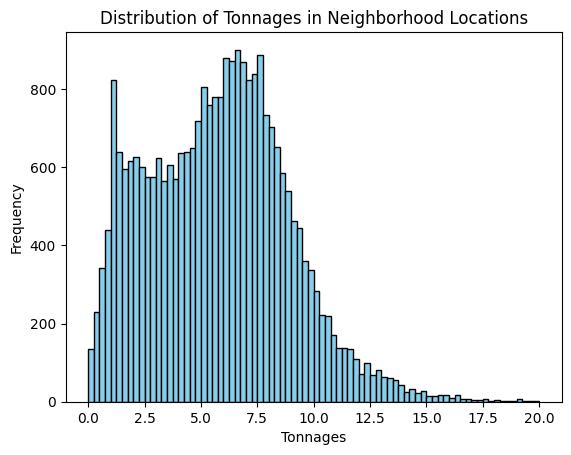

In [25]:
plt.hist(neighborhood_walmart_df['Tonnage'], bins=80, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Neighborhood Locations')
plt.show()

<div style="font-size: 25px;">
Ermmm guys there seems to be no difference between regular and neighborhood walmart locations 🤓. However, supercenter locations seem to have more normally distributed tonnages than non-supercenter locations!!
<div>